Question 3

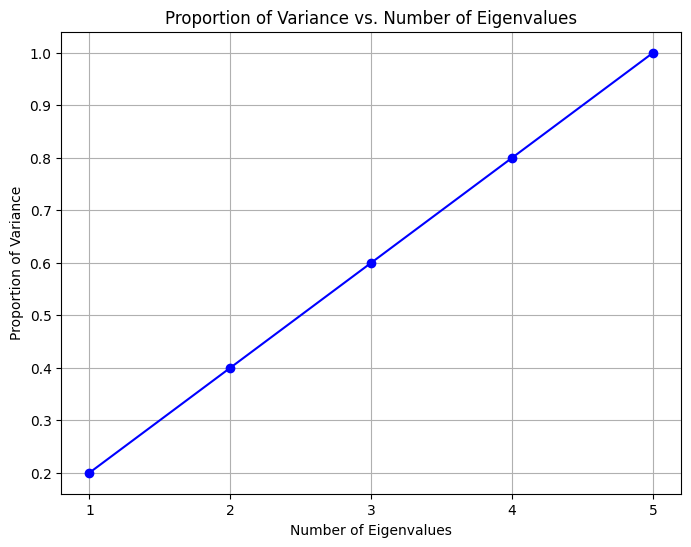

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# For question 3, we plot the proportion of variance as a function of the number of eigenvalues.
# Given: Each eigenvalue is equal to 2, and there are 5 dimensions.

eigenvalues = [2, 2, 2, 2, 2]  # Eigenvalues for each of the 5 dimensions
total_variance = sum(eigenvalues)  # Total variance is the sum of all eigenvalues

# Calculating the proportion of variance explained by each additional eigenvalue
proportions_of_variance = [sum(eigenvalues[:i+1]) / total_variance for i in range(len(eigenvalues))]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), proportions_of_variance, marker='o', linestyle='-', color='b')
plt.title('Proportion of Variance vs. Number of Eigenvalues')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Proportion of Variance')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()



Question 4

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Random data here, in reality would be provided
X = np.random.rand(100, 5)
Y = np.random.rand(100)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shape of the train and test sets as a basic check
X_train_scaled.shape, X_test_scaled.shape, Y_train.shape, Y_test.shape


((70, 5), (30, 5), (70,), (30,))

Question 5

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Assuming Xtr and Xts are defined somewhere earlier in the context or loaded from a dataset
# Here, we'll create dummy Xtr and Xts for the demonstration
np.random.seed(0)  # For reproducibility
Xtr = np.random.rand(80, 5)  # 80 samples, 5 features for training
Xts = np.random.rand(20, 5)  # 20 samples, 5 features for testing
Ytr = np.random.randint(0, 2, 80)  # Binary target variable for training
Yts = np.random.randint(0, 2, 20)  # Binary target variable for testing

# Function to find the best model using N features
def find_best_model(X_train, Y_train, X_test, Y_test, num_features):
    features_combinations = list(combinations(range(X_train.shape[1]), num_features))
    best_score = -1
    best_features = None
    
    for features in features_combinations:
        # Selecting features for this combination
        X_train_subset = X_train[:, features]
        X_test_subset = X_test[:, features]
        
        # Training and evaluating the model
        model = LinearRegression()
        model.fit(X_train_subset, Y_train)
        Y_pred = model.predict(X_test_subset)
        score = mean_squared_error(Y_test, Y_pred)
        
        # Updating the best score and features
        if best_score == -1 or score < best_score:
            best_score = score
            best_features = features
    
    return best_features

# Finding the best model using only one feature
best_one_feature = find_best_model(Xtr, Ytr, Xts, Yts, 1)

# Finding the best model using only two features
best_two_features = find_best_model(Xtr, Ytr, Xts, Yts, 2)

best_one_feature, best_two_features


((3,), (3, 4))

Question 7

[4. 6.] -7.0
[1 1 1 1 1]


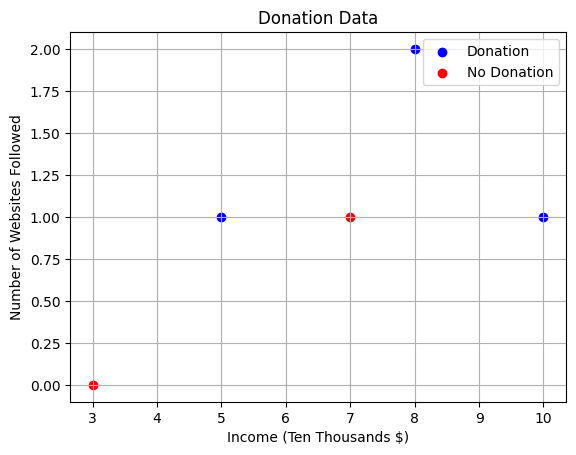

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
%matplotlib inline

# Given data
income = [3, 5, 7, 8, 10]  # Income in ten thousands
num_websites = [0, 1, 1, 2, 1]  # Number of websites
donate = [0, 1, 0, 1, 1]  # Donate (1=yes, 0=no)

# Converting the data into arrays for easy manipulation
income = np.array(income)
num_websites = np.array(num_websites)
donate = np.array(donate)

# Scatter plot
plt.scatter(income[donate == 1], num_websites[donate == 1], color='blue', label='Donation')
plt.scatter(income[donate == 0], num_websites[donate == 0], color='red', label='No Donation')
plt.title('Donation Data')
plt.xlabel('Income (Ten Thousands $)')
plt.ylabel('Number of Websites Followed')
plt.legend()
plt.grid()


# Preparing the data for the classifier
X = np.column_stack((income, num_websites))
y = donate

# Training a Perceptron to find a linear classifier
clf = Perceptron(tol=1e-3, random_state=0, max_iter=1000)
clf.fit(X, y)

# The weight vector (w) and the bias (b)
w = clf.coef_[0]
b = clf.intercept_[0]

print(w, b)

print(clf.predict(X))

